In [1]:
import numpy as np
from PYME.recipes import modules
from PYME.LMVis import pipeline
from PYME.recipes import localisations
from PYME.recipes import tablefilters
from PYME.recipes import tracking

data = pipeline.Pipeline('030320_sF(ROI+fiducial).hdf') 
data.recipe.update_from_yaml('recipe to drift correct and filter 030320.yaml') 
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) 
data.selectDataSource('ROI')

co = tracking.FindClumps(inputName='ROI', output='with_clumps', outputClumps=''); data.recipe.add_module(co);
clu = localisations.MergeClumps(inputName='with_clumps', outputName='coalesced'); data.recipe.add_module(clu);
DBS = localisations.DBSCANClustering(inputName='coalesced', outputName='dbscanClustered', minClumpSize = 3, searchRadius = 50,); data.recipe.add_module(DBS);
ids = tablefilters.FilterTable(inputName='dbscanClustered', outputName='validCluster', filters = {'dbscanClumpID' : [0.5, 185]}); data.recipe.add_module(ids);
data.recipe.execute()

/Users/csoe002/miniconda3/envs/pyme38_2/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Trying to load 3rd party recipe module PYMEnf.recipes.pymenf
Loaded 3rd party recipe module PYMEnf.recipes.pymenf
Trying to load 3rd party recipe module PYMEcs.recipes.localisations
Loaded 3rd party recipe module PYMEcs.recipes.localisations
Trying to load 3rd party recipe module PYMEcs.recipes.output
Loaded 3rd party recipe module PYMEcs.recipes.output
Trying to load 3rd party recipe module PYMEcs.recipes.base
Loaded 3rd party recipe module PYMEcs.recipes.base
Trying to load 3rd party recipe module PYMEcs.recipes.simpler
Loaded 3rd party recipe module PYMEcs.recipes.simpler
Trying to load 3rd party recipe module PYMEcs.recipes.processing
Loaded 3rd party recipe module PYMEcs.recipes.processing
recipe.execute()
Executing <PYME.recipes.localisations.Pipelineify object at 0x13d5ed310>
Executing <PYME.recipes.localisations.ProcessColour object at 0x13d65d680>
Executing <PYME.recipes.tablefilters.FilterTable object at 0x13d65dc70>
recipe.execute()
Executing <PYME.recipes.localisations.Pipe

/Users/csoe002/Documents/src/PYMEsrc/pyme38/PYME/IO/tabular.py:48: VisibleDeprecationWarning: mappingFilter is deprecated, use MappingFilter instead
  warnings.warn(VisibleDeprecationWarning('%s is deprecated, use %s instead' % (name, cls.__name__)))
/Users/csoe002/Documents/src/PYMEsrc/PYME-extra-py38/PYMEcs/Analysis/trackFiducials.py:154: RuntimeWarning: Mean of empty slice
  mm = np.nanmean(meas, 0)
/Users/csoe002/Documents/src/PYMEsrc/pyme38/PYME/Analysis/Tracking/trackUtils.py:34: UserWarning: Could not import mpld3, track plotting will not work
  warnings.warn('Could not import mpld3, track plotting will not work')


Executing <PYME.recipes.localisations.DBSCANClustering object at 0x13d6aaea0>
Executing <PYME.recipes.tablefilters.FilterTable object at 0x13d56e540>


recipe.execute()
Executing <PYME.recipes.localisations.TimeBlocks object at 0x13d56e860>
[]
['fitResults_z0', 'fitResults_x0', 'slicesUsed_x_stop', 'slicesUsed_x_step', 'startParams_bg', 'fitError_y0', 'startParams_dy', 'startParams_dx', 'resultCode', 'startParams_br', 'slicesUsed_x2_step', 'startParams_A', 'ratio', 'error_y', 'error_z', 'slicesUsed_y2_step', 'fitResults_dy', 'fitResults_br', 'slicesUsed_y_stop', 'z_raw', 'slicesUsed_y2_stop', 'startParams_x0', 'fitResults_bg', 'fitError_bg', 'A', 'startParams_z0', 'fitResults_y0', 'nchi2', 'subtractedBackground_r', 'fitError_A', 'slicesUsed_y_step', 'focus', 'slicesUsed_x_start', 'slicesUsed_x2_stop', 'fitError_x0', 'fitError_z0', 'fitError_br', 'error_x', 'fitError_dy', 'fitResults_A', 'tIndex', 'subtractedBackground_g', 'slicesUsed_x2_start', 'drifty', 'driftx', 'driftz', 'x_raw', 'y_raw', 'slicesUsed_y2_start', 't', 'fitResults_dx', 'y', 'x', 'fitError_dx', 'z', 'startParams_y0', 'slicesUsed_y_start', 'fiducial_x', 'fiducial_y', 'f

/Users/csoe002/Documents/src/PYMEsrc/PYME-extra-py38/PYMEcs/experimental/FRC.py:143: PYMEDeprecationWarning: This will either disappear or change function as we move to a 5D data model. Use the explicit .data_xytc instead, or even better, change to using the 5D model as image.data_xyztc or image.voxels
  im0 = image.data[:,:,:,channels[0]].squeeze()
<ipython-input-2-40ac4c14251a>:27: PYMEDeprecationWarning: This will either disappear or change function as we move to a 5D data model. Use the explicit .data_xytc instead, or even better, change to using the 5D model as image.data_xyztc or image.voxels
  FRC_entire_ROI = data.dataSources['FRCROI'];FRC_entire_ROI.data.shape
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


res-1/7     = 33.0 nm
recipe.execute()


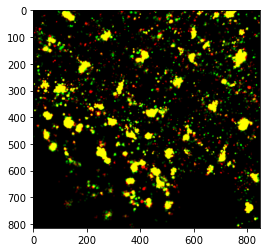

In [2]:
import matplotlib.pyplot as plt
tb = localisations.TimeBlocks(input='ROI',output='tbROI', block_size=100)
data.recipe.add_module(tb)
dm = localisations.DensityMapping(inputLocalizations='tbROI', jitterVariable="error_x",outputImage="FRCROI",
    pixelSize=10.0, renderingModule='Gaussian', colours=['block0','block1'])
data.recipe.add_module(dm)
data.recipe.execute()
image = data.dataSources['FRCROI']
from PYMEcs.experimental import FRC
freqs,frc1,smoothed,fhb,f7,halfbit = FRC.frc_from_image(image,[0,1])
print('res-1/7     = %3.1f nm' % (1.0/f7[0]));
data.recipe.execute()
# CS code
def rgbwrap(r,g=None,b=None,vmax=None,vmin=None):
    if vmax is None:
        vmax = r.max()
    if vmin is None:
        vmin = r.min()
    rgbim = np.zeros(list(r.shape[0:2])+[3])
    rgbim[:,:,0] = (r-vmin)/(vmin+vmax)
    if not (g is None):
        rgbim[:,:,1] = (g-vmin)/(vmin+vmax)
    if not (b is None):
        rgbim[:,:,2] = (b-vmin)/(vmin+vmax)
    return rgbim

FRC_entire_ROI = data.dataSources['FRCROI'];FRC_entire_ROI.data.shape

rgbim = rgbwrap(FRC_entire_ROI.data[:,:,0,0].squeeze(),FRC_entire_ROI.data[:,:,0,1].squeeze(),vmax=0.2)
plt.figure(); plt.imshow(rgbim)

recipe.execute()
Executing <PYME.recipes.localisations.TimeBlocks object at 0x14cb9d950>
[]
['fitResults_z0', 'fitResults_x0', 'startParams_bg', 'startParams_dy', 'startParams_dx', 'resultCode', 'startParams_br', 'startParams_A', 'ratio', 'fitResults_dy', 'fitResults_br', 'z_raw', 'startParams_x0', 'fitResults_bg', 'A', 'startParams_z0', 'fitResults_y0', 'nchi2', 'subtractedBackground_r', 'focus', 'fitResults_A', 'tIndex', 'subtractedBackground_g', 'drifty', 'driftx', 'driftz', 'x_raw', 'y_raw', 't', 'fitResults_dx', 'error_y', 'y', 'error_x', 'x', 'error_z', 'z', 'startParams_y0', 'fiducial_x', 'fiducial_y', 'fiducial_z', 'clumpIndex', 'clumpSize', 'trackVelocity', 'clumpEdge', 'dbscanClumpID']
Executing <PYME.recipes.localisations.DensityMapping object at 0x1556144a0>
Created colour filter with chans: ['block0', 'block1']


<ipython-input-3-99202028804d>:28: PYMEDeprecationWarning: This will either disappear or change function as we move to a 5D data model. Use the explicit .data_xytc instead, or even better, change to using the 5D model as image.data_xyztc or image.voxels
  FRC_entire_ROI = data.dataSources['FRCvalidCluster'];FRC_entire_ROI.data.shape
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


res-1/7     = 36.4 nm
recipe.execute()


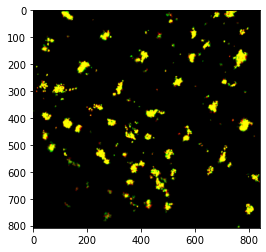

In [3]:
data.selectDataSource('validCluster')
tb = localisations.TimeBlocks(input='validCluster',output='tbvalidCluster', block_size=100)
data.recipe.add_module(tb)
dm = localisations.DensityMapping(inputLocalizations='tbvalidCluster', 
                                  jitterVariable="error_x",outputImage="FRCvalidCluster",
    pixelSize=10.0, renderingModule='Gaussian', colours=['block0','block1'])
data.recipe.add_module(dm)
data.recipe.execute()
image = data.dataSources['FRCvalidCluster']
from PYMEcs.experimental import FRC
freqs,frc1,smoothed,fhb,f7,halfbit = FRC.frc_from_image(image,[0,1])
print('res-1/7     = %3.1f nm' % (1.0/f7[0]));
data.recipe.execute()
# CS code
def rgbwrap(r,g=None,b=None,vmax=None,vmin=None):
    if vmax is None:
        vmax = r.max()
    if vmin is None:
        vmin = r.min()
    rgbim = np.zeros(list(r.shape[0:2])+[3])
    rgbim[:,:,0] = (r-vmin)/(vmin+vmax)
    if not (g is None):
        rgbim[:,:,1] = (g-vmin)/(vmin+vmax)
    if not (b is None):
        rgbim[:,:,2] = (b-vmin)/(vmin+vmax)
    return rgbim

FRC_entire_ROI = data.dataSources['FRCvalidCluster'];FRC_entire_ROI.data.shape

rgbim = rgbwrap(FRC_entire_ROI.data[:,:,0,0].squeeze(),FRC_entire_ROI.data[:,:,0,1].squeeze(),vmax=0.2)
plt.figure(); plt.imshow(rgbim)

In [4]:
np.version.version

'1.23.2'